### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

### Read "Valid.csv" and set it to dataframe variable

In [2]:
df=pd.read_csv('Valid.csv')

### View the top 5 rows

In [3]:
df.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


### View info of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB


### View the basic statistical information about the data

In [5]:
df.isna().sum()

text     0
label    0
dtype: int64

### Check for duplicates

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [7]:
df.duplicated().sum()

2

### Drop Duplicated Rows

In [8]:
df.drop_duplicates(inplace=True)

### RE-Check the duplicates

In [9]:
df.duplicated().sum()

0

### Plot a Countplot of 'label'

<Axes: xlabel='label', ylabel='count'>

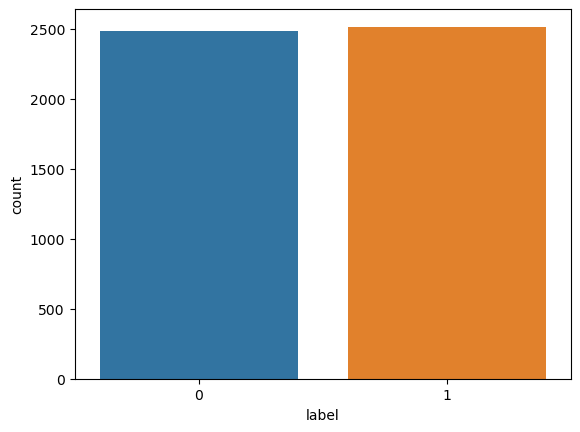

In [10]:
sns.countplot(x=df['label'])

### Define a function that preprocess the text

In [11]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

### Apply the function to text column

In [12]:
def pre(sentence):
    tex = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    words = [x.lower() for x in tex if x not in stopwords.words('english')]
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    word = ' '.join(word)
    return word

In [13]:
df['text']=df['text'].apply(pre)

### Print some of the text after preprocessing

In [14]:
for i in range(10):
    print(df['text'][i])

it 14 years since sharon stone award viewers leg cross twist many people mind and god know game basic instinct 2 sequel smash hit erotica basic instinct feature sexy stone vulnerable michael douglas however fan original might even get close one since instinct 2 painful film make mediocre director michael caton jones assassinate legacy first film br br the plot movie start car explosion break right begin catherine tramell sharon stone try look forcefully sexy suspect appear involve murder a psychiatrist horrible david morrisey appoint examine eventually fall intimate game seduction br br and without explanations basic force move instinct nothing much explain sit sleazy c class erotic film sharon stone star first role time turn part amateurish write careless direction terrifyingly low chemistry the movie full vulgar dialogues even sexuality menage trois scene cut rat nc 17 first entrance series instinct compel torture br br to top everything make original film guilty pleasure find anywhe

### Assign X and y variables

In [15]:
X = df['text'][0:500] 
y = df['label'][0:500]

### Split the data into training and testing set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=100)

### Install transformers library

In [18]:
!pip install transformers

In [19]:
import tensorflow as tf
from transformers import DistilBertTokenizerFast,TFDistilBertForSequenceClassification, TFAutoModelForSequenceClassification
from tensorflow.keras.optimizers import Adam

### Tokenize the Data

In [20]:
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

In [21]:
train_encoding = tokenizer(X_train.tolist(), truncation=True, padding=True)
test_encoding = tokenizer(X_test.tolist(), truncation=True, padding=True)

In [22]:
import tensorflow as tf

train_dataset= tf.data.Dataset.from_tensor_slices((dict(train_encoding),y_train))
test_dataset= tf.data.Dataset.from_tensor_slices((dict(test_encoding),y_test))

### Initialize and compile the model

In [23]:
model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [24]:
model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Train the model

In [25]:
history = model.fit(train_dataset.shuffle(1000).batch(16), 
                    epochs=5, 
                    batch_size=16,
                    validation_data=test_dataset.batch(16))

Epoch 1/5
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert



7/7 [==============================] - 356s 47s/step - loss: 0.7862 - accuracy: 0.4900 - val_loss: 0.6939 - val_accuracy: 0.4700
Epoch 2/5
7/7 [==============================] - 341s 48s/step - loss: 0.6986 - accuracy: 0.5300 - val_loss: 0.6920 - val_accuracy: 0.5300
Epoch 3/5
7/7 [==============================] - 350s 48s/step - loss: 0.7924 - accuracy: 0.5100 - val_loss: 0.7084 - val_accuracy: 0.5300
Epoch 4/5
7/7 [==============================] - 310s 45s/step - loss: 0.8959 - accuracy: 0.5500 - val_loss: 0.7243 - val_accuracy: 0.4700
Epoch 5/5
7/7 [==============================] - 367s 54s/step - loss: 0.6940 - accuracy: 0.5300 - val_loss: 0.6913 - val_accuracy: 0.5300


### Evaluate the Model

In [26]:
loss, accuracy = model.evaluate(test_dataset.batch(16))
print(f"Test Accuracy: {accuracy}")

25/25 [==============================] - 112s 4s/step - loss: 0.6913 - accuracy: 0.5300
Test Accuracy: 0.5299999713897705


### Visualize the Training History

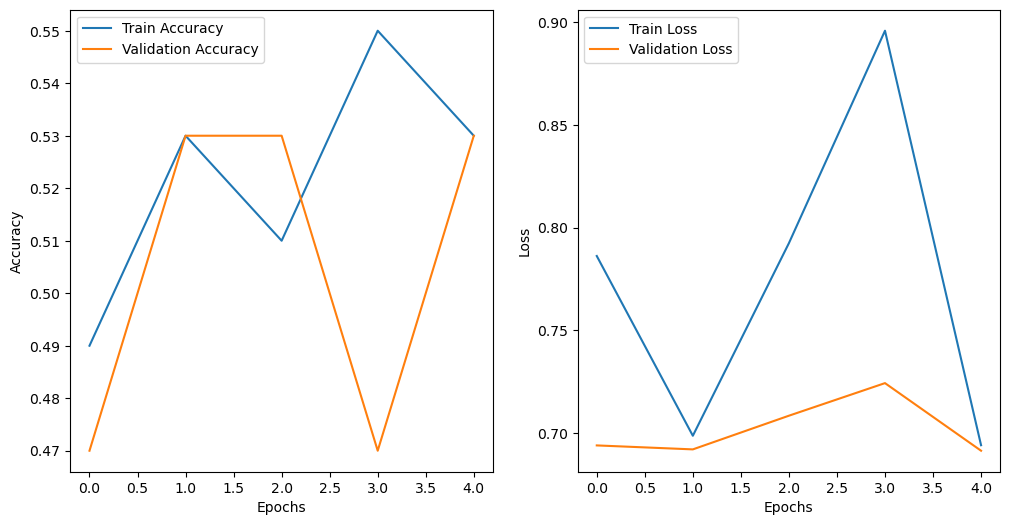

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Make predictions on the test set

In [32]:
y_pred = model.predict(test_dataset.batch(16))
y_pred = np.argmax(y_pred.logits, axis=1)

25/25 [==============================] - 114s 4s/step


### Plot a Heatmap

In [33]:
from sklearn.metrics import confusion_matrix

<Axes: >

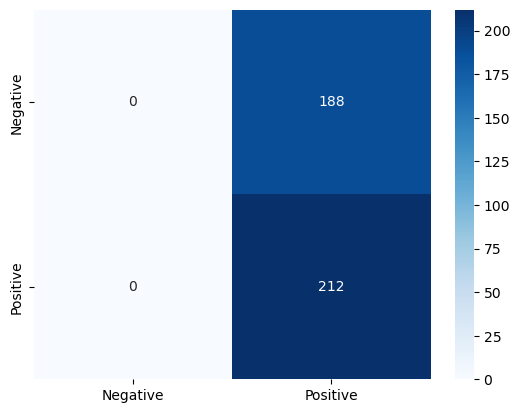

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])